In [1]:
using LinearAlgebra

Consider a regular linear regression task with $m \times n$ dimensional features matrix $A$ and outputs $b$ where we want to learn weights $w$. The least squares solution ($\text{min}||b-Aw||_2^2$) for this task is: $w = (A^T A)^{-1} A^T b$. Note that $A^T A$ should be invertible so that the solution exists. In order for this $n \times n$ dimensional matrix to be invertible, rank($A$) must be $n$. Examples with $m>n$ case given below. 

In [2]:
A = [1 0 1; 0 1 1; 1 0 1; 2 1.5 3]

4×3 Array{Float64,2}:
 1.0  0.0  1.0
 0.0  1.0  1.0
 1.0  0.0  1.0
 2.0  1.5  3.0

In [3]:
inv(transpose(A)*A)

3×3 Array{Float64,2}:
  17.5   16.0  -19.0
  16.0   16.0  -18.0
 -19.0  -18.0   21.0

In [4]:
A = [1 0 1; 0 1 1; 1 0 1; 2 1.5 3.5]

4×3 Array{Float64,2}:
 1.0  0.0  1.0
 0.0  1.0  1.0
 1.0  0.0  1.0
 2.0  1.5  3.5

In [5]:
inv(transpose(A)*A)

SingularException: SingularException(3)

But $A^T A$ is a positive semi-definite symmetric matrix.

__Proof__: It is symmetric => $(A^T A)^T = A^T A$

__Proof__: It is positive semi-definite => $x^T A^T A x = (Ax)^T \cdot Ax = ||Ax||_2^2 \geq 0$

In [6]:
det(transpose(A)*A)

0.0

In case $m<n$, Aw = b is underdetermined. Rank($A^T A$) is less than $n$ which makes it positive semi-definite and not-invertable. Intuitively, this means that there are more than one way to determine $w$ such that the objective is minimized. Therefore, there should be a goodness criteria for $w$ to favor some solutions to others. This is achieved by an additional regularization term and this criteria differs from application to application.

__Note__: Sometimes Julia finds the inverse matrix of this Gram matrix. When I look at the determinant it is not zero but very close to it sth like e-32 or so. I guess this is due to rounding errors.

A simple example is with a constraint on 2-norm of $w$: $\underset{w}{\text{min}}||Aw-b||_2^2 + \alpha ||w||_2^2$ for $\alpha > 0$. Taking the graident of objective w.r.t $w$ and equalizing to vector of 0s: $0 = 2 A^T A w - 2 A^T b + 2 \alpha w$, leads to $w = (A^T A + \alpha I)^{-1} A^T b$. So we forces Gram matrix to be positive definite. Examples below:

In [7]:
A = randn(4,6)
b = randn(4)
w = inv(transpose(A)*A)*transpose(A)*b

6-element Array{Float64,1}:
 -2.217902809422099 
 -1.8062025379735815
 -7.070149716559727 
  7.720234364571382 
  1.5987689611311164
 -0.6134783709600078

In [8]:
alfa = 0.1
w = inv(transpose(A)*A + diagm(alfa*ones(6)))*transpose(A)*b

6-element Array{Float64,1}:
  0.11896570884487312 
 -0.8139126871190561  
  0.32613597075569833 
  0.2484387832138445  
  0.03687189052174089 
 -0.026097154804737253

In [9]:
det(transpose(A)*A)

-1.4210231693913534e-29

In [10]:
det(transpose(A)*A + diagm(alfa*ones(6)))

8.179088135143022

# Cholesky Decomposition

Similar to LU decomposition, we can decompose a positive definite symmetric matrix $C$ as $L L^T$ where L is a lower triangular matrix with all positive entries in the diagonal. 

Cholesky decomposition is useful becuase of several reasons: 1) for large matrices it is enough to keep L in the memory which is memory eficient since many elements are zero and doesn't require to be stored. 2) it allows fast matrix multiplications. 3) it is more robust to rounding errors than LU decomposition. Consider a rounding error in L. In LU decomposition we loose positive definiteness while in Cholesky decomposition LL^T is still positive definite.

In [11]:
D = cholesky(transpose(A)*A + diagm(alfa*ones(6)));

In [12]:
D.L

6×6 LowerTriangular{Float64,Array{Float64,2}}:
  2.90278     ⋅          ⋅          ⋅           ⋅         ⋅      
  1.74984    2.41515     ⋅          ⋅           ⋅         ⋅      
 -1.17075    0.113871   1.04073     ⋅           ⋅         ⋅      
 -0.206813   0.801088   0.576802   0.513688     ⋅         ⋅      
  1.78938   -1.92721    1.25173   -0.969181    1.45942    ⋅      
  1.07489   -0.862432  -1.73335    0.0800226  -0.571193  0.522848

In [13]:
D.U

6×6 UpperTriangular{Float64,Array{Float64,2}}:
 2.90278  1.74984  -1.17075   -0.206813   1.78938    1.07489  
  ⋅       2.41515   0.113871   0.801088  -1.92721   -0.862432 
  ⋅        ⋅        1.04073    0.576802   1.25173   -1.73335  
  ⋅        ⋅         ⋅         0.513688  -0.969181   0.0800226
  ⋅        ⋅         ⋅          ⋅         1.45942   -0.571193 
  ⋅        ⋅         ⋅          ⋅          ⋅         0.522848 

# Matrix Norm

__Induced matrix norm:__ $||A|| = \text{max} \frac{||Ax||}{||x||}$ which is how much a vector is stretched at most. Searching among the vectors with ||x|| = 1, which refers to the points on a unit circle for 2-dimensional vectors, A makes this unit circle an ellipse and we seek for its major axis. 

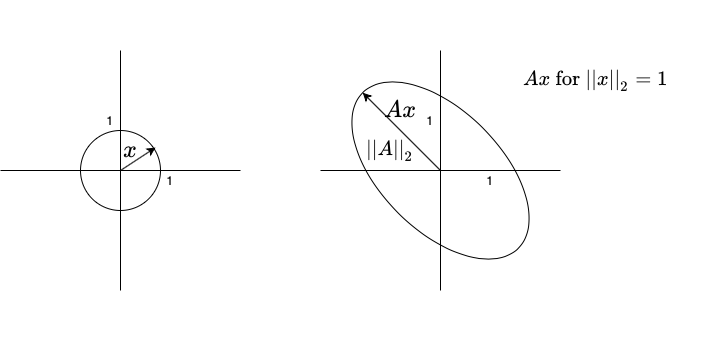

In [1]:
display("image/png", read("matrixNorm.png"))

The indiced two norm or __spectral norm__ of $A$ is the square root of the largest eigenvalue of $A^T A$: 

$||A||_2 = \text{max} \{ \sqrt{\lambda}: \text{there exists x s.t. } A^T A x = \lambda A^T A \}$

__Matrix Condition Number:__ Matrix condition number defines the sensitivity in a linear system $Ax = b$ which is how much $x$ changes when $A$ and $b$ are perturbated with a small amount $A+\epsilon$, $b+\epsilon$. We desire condition number to be small to have more stable systems.

It is defined by $\big(\text{max} \frac{||Ax||}{||x||}\big) \cdot \big(\text{min} \frac{||Ay||}{||y||}\big)^{-1}$ for a matrix norm $||\cdot||$ or equivalently $||A|| ||A^{-1}||$. Returning back to the 2-diemnsional case, this equations imply that condition number is the ratio of the large major axis to small major axis. So, we prefer round like transformations.